### Ada Boost - Classificaton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Step 1 - Loading the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
missed_col = df.columns[df.isnull().any()].values
print("The missing column in the dataset are", missed_col)

The missing column in the dataset are []


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### visualise the dataset

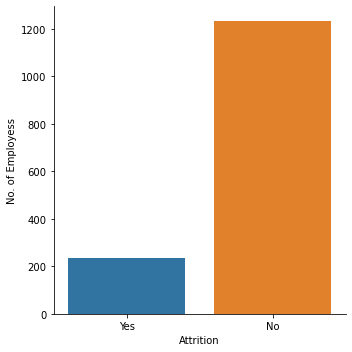

In [6]:
ax = sns.catplot(x = 'Attrition', kind='count', data=df)
ax.set(xlabel = 'Attrition', ylabel = 'No. of Employess')
plt.show()

### Step 2 - Feature Engineering

In [7]:
df_num = pd.DataFrame(df.select_dtypes(include = 'int64'))
df_cat = pd.DataFrame(df.select_dtypes(include = 'object'))

In [8]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


#### Step 2.1 - Encode the categorial variables

In [9]:
df_cat = df_cat.drop("Attrition", axis = 1)

In [10]:
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


#### Step 2.2 - Scaling Numeric fields

The numeric fields has been scaled next for best results. StandardScaler() is been used for scaling the variables and managed with categorial values.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
standard_scaler = StandardScaler()
df_num_scaled = standard_scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(data=df_num_scaled, columns=df_num.columns, index = df_num.index)
print("Shape of numberic after scaling:", df_num_scaled.shape)
print("Shape of categorical after encoding:", df_cat_encoded.shape)

Shape of numberic after scaling: (1470, 26)
Shape of categorical after encoding: (1470, 29)


In [13]:
df_transformed_final = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
print("Shape of final dataframe:", df_transformed_final.shape)

Shape of final dataframe: (1470, 55)


In [16]:
target = df['Attrition']

map = {'Yes' : 1, 'No' : 0}
target = target.apply(lambda x: map[x])

X = df_transformed_final
y = target
print("Shape of target: ", target.shape) 

Shape of target:  (1470,)


### Step 2.3 - Train and Test Split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

print("size of X_train", X_train.shape)
print("size of X_test", X_test.shape)
print("size of y_train", y_train.shape)
print("size of y_test", y_test.shape)

size of X_train (1176, 55)
size of X_test (294, 55)
size of y_train (1176,)
size of y_test (294,)


### Step 3 - Model Fitting

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
adaboost = AdaBoostClassifier(n_estimators=200, random_state=1)

In [22]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [23]:
y_pred_test = adaboost.predict(X_test)

In [25]:
print("Accuracy of the model: ", accuracy_score(y_test, y_pred_test))

Accuracy of the model:  0.8537414965986394


In [26]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[234  13]
 [ 30  17]]
